# K-Centers: A Demo of Variations on K-means Clustering Using Various Cost Metrics
### Author: Daniel Wang

In [1]:
import numpy as np
import sklearn.preprocessing as skpp
import sklearn.datasets as skds
import matplotlib.pyplot as plt
from itertools import cycle, islice

from kmeans import KMeans # this is the custom class that we wrote


Using cost metric: L1
This may take a while.

Using cost metric: L1
This may take a while.

Using cost metric: L1
This may take a while.

Using cost metric: L1
This may take a while.

Using cost metric: L1
This may take a while.

Using cost metric: L1
This may take a while.


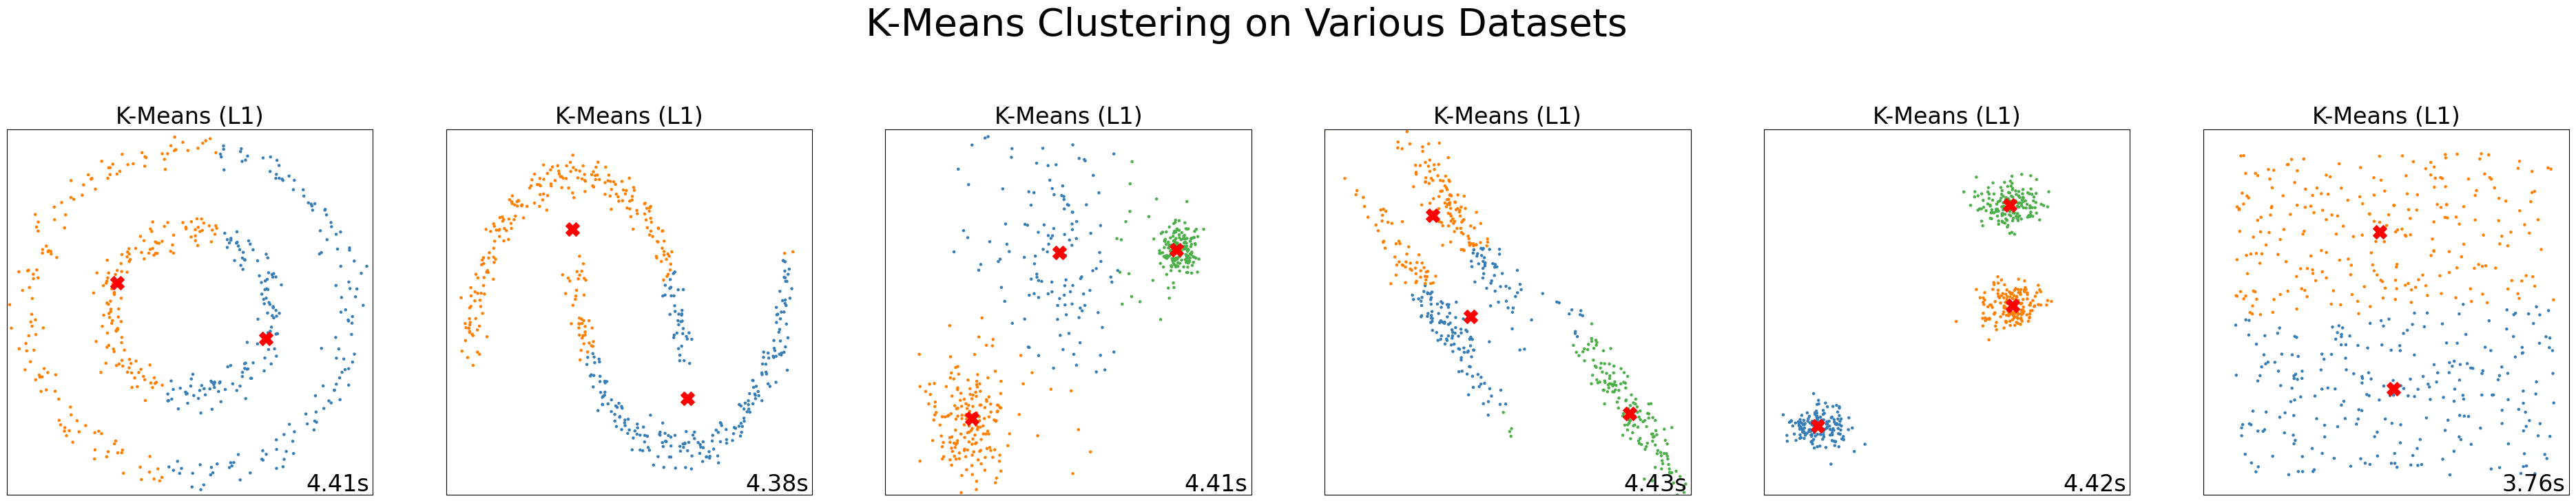

In [2]:
import numpy as np
import sklearn.preprocessing as skpp
import sklearn.datasets as skds
import matplotlib.pyplot as plt
from itertools import cycle, islice

from kmeans import KMeans # this is the custom class that we wrote

import time
from sklearn.neighbors import kneighbors_graph

seed = 0

# Generate datasets
n_samples = 500
noisy_circles = skds.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = skds.make_moons(n_samples=n_samples, noise=.05)
blobs = skds.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

random_state = 170
X, y = skds.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

varied = skds.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']), len(np.unique(y)))))

cost_metric = 'L1'  # Cost metric

datasets = [noisy_circles, noisy_moons, varied, aniso, blobs, no_structure]

# Adjust the figsize parameter based on the number of datasets
fig_width = len(datasets) * 8  # Increase width for larger subplots
fig_height = 8  # Increase height for larger subplots

plt.figure(figsize=(fig_width, fig_height))

plot_num = 1
for i_dataset, dataset in enumerate(datasets):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = skpp.StandardScaler().fit_transform(X)

    n_clusters = 3 if i_dataset in [2, 3, 4] else 2

    # Create and fit the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, max_iter=400)
    t0 = time.time()
    kmeans.fit(X, cost_metric=cost_metric, max_steps=100, descent_rate=0.1, random_state=seed)
    t1 = time.time()
    y_pred = kmeans.predict(X, cost_metric=cost_metric)

    # plot
    plt.subplot(1, len(datasets), plot_num, aspect='equal')
    plt.title(f'K-Means ({cost_metric})', size=24)  # Increase title font size
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=5)

    if hasattr(kmeans, 'centroids'):
        centers = kmeans.centroids
        plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', zorder=10, marker='X')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.xticks(())
    plt.yticks(())
    plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                transform=plt.gca().transAxes, size=24,
                horizontalalignment='right')
    plot_num += 1

# Increase the suptitle font size and adjust the position
plt.suptitle('K-Means Clustering on Various Datasets', size=40, y=1.05)

plt.show()


## Comparison of K-Medians (using the geometric median) and K-Means (using the centroid)


Using cost metric: squared_euclidean

Using cost metric: euclidean
This may take a while.


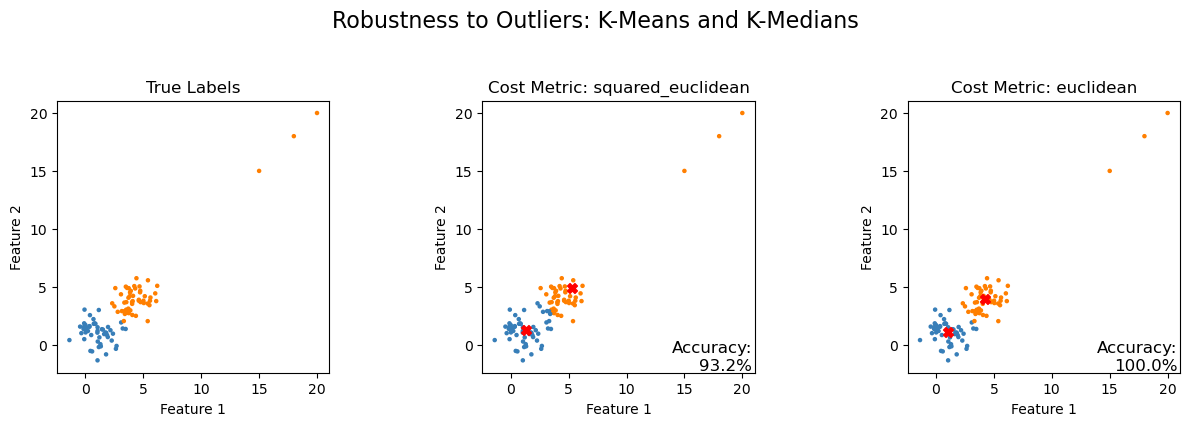

In [21]:
# Generate a synthetic dataset with outliers
seed = 4
n_samples = 100
centers = [[1, 1], [4, 4]]  # Main clusters
outliers = [[15, 15], [18, 18], [20, 20]]  # Outliers far away from the main clusters
X, y = skds.make_blobs(n_samples=n_samples, centers=centers, random_state=seed)
X = np.concatenate([X, outliers])
y = np.concatenate([y, [1, 1, 1]])

# List of cost metrics
cost_metrics = ['squared_euclidean', 'euclidean']

# Create subplots for each cost metric
fig, axes = plt.subplots(1, len(cost_metrics)+1, figsize=(12, 4))
fig.suptitle("Robustness to Outliers: K-Means and K-Medians", fontsize=16, y=1.05)

# Plot the original data, colored by the true labels
axes[0].scatter(X[:, 0], X[:, 1], c=colors[y], s=5)
axes[0].set_title('True Labels')
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
axes[0].set_aspect('equal')

# Perform k-means clustering for each cost metric
for i, cost_metric in enumerate(cost_metrics):
    # Initialize and fit KMeans
    kmeans = KMeans(n_clusters=2, max_iter=600)
    kmeans.fit(X, cost_metric=cost_metric, max_steps=200, random_state=seed)

    # Define the color scheme
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']), int(max(kmeans.labels) + 1))))

    # Plot the data points and centroids
    ax = axes[i+1]
    ax.scatter(X[:, 0], X[:, 1], c=colors[kmeans.labels], s=5)
    ax.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='X', c='red', s=50, zorder=9)
    ax.set_title(f"Cost Metric: {cost_metric}")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_aspect('equal')
    # Display the accuracy of the labels in the bottom right corner as a percentage
    plt.text(.99, .01, ('Accuracy:\n%.1f%%' % (100*max(np.mean(kmeans.labels == y), np.mean(kmeans.labels != y)))).lstrip('0'),
             transform=ax.transAxes, size=12, horizontalalignment='right')


plt.tight_layout()
plt.show()



Using cost metric: squared_euclidean


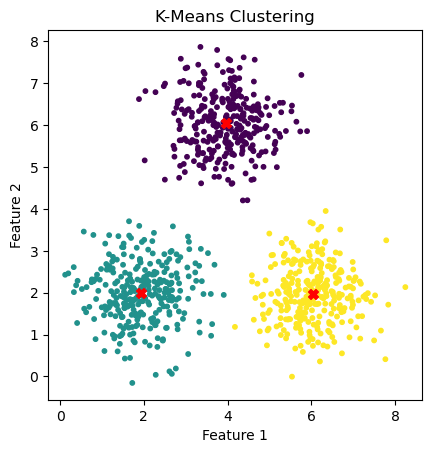

In [22]:
# Set the random seed for reproducibility
np.random.seed(0)

# Generate the data
n_samples = 300
mean1 = [2, 2]
cov1 = [[0.5, 0], [0, 0.5]]
cluster1 = np.random.multivariate_normal(mean1, cov1, n_samples)

mean2 = [6, 2]
cov2 = [[0.5, 0], [0, 0.5]]
cluster2 = np.random.multivariate_normal(mean2, cov2, n_samples)

mean3 = [4, 6]
cov3 = [[0.5, 0], [0, 0.5]]
cluster3 = np.random.multivariate_normal(mean3, cov3, n_samples)

# Combine the data from the three clusters
X = np.concatenate((cluster1, cluster2, cluster3))

# Perform k-means clustering
kmeans = KMeans()
kmeans.fit(X, random_state=0)

# Plot the data points and cluster centroids
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels, cmap='viridis', s=10)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='X', c='red', s=50, zorder=9)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.gca().set_aspect('equal')
plt.show()
